# Unsupervised Machine Learning with Diamonds

Data source = https://www.kaggle.com/shivam2503/diamonds/

Goal: to use unsupervised machine learning clustering algoritms such as kmeans, DBSCAN, and hierarchial clustering with Scikit Learn to see if we can get gain any grouping insights from a set of over 50,000 sold diamonds.

For our data frame, we will look at the effects of clustering when we scale and standardize the data, and when we include price or not in our study. We will look at the following 3 data frames and observe any differences:

a.) Outliers removed, diamond shape values standardized, price excluded

b.) Outliers removed, diamond shape values standardized, and ordinal values along with carat, and price are scaled with MinMax Scaler. Price excluded.

c.) Same as 'b' with Price Included.

In [22]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
diamond = pd.read_csv("diamonds.csv")
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Cleaning and Exploration

Investigate data frame and provide cleaning. First check for any null values and useless columns.

In [3]:
# Check for NaN (null) values
diamond.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [4]:
# We have no null values, which is good news. Lets investigate the 'Unnamed: 0 ' column, this appears to be 
# just a repeat of the index.
diamond['Unnamed: 0'].value_counts().max()

1

In [5]:
# Hence, lets drop this column.
diamond.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Investigating the categorical 3 c's: Cut, Clarity, Color. First, Cut:

In [7]:
diamond['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

We have 5 different values for cut. To convert this to numeric values, we will assign each cut value a numeric score (5 being the best, 1 being the worst). We can create a dictionary storing each cut type with its respective score.

In [8]:
cut_score = [1,2,5,4,3]
cut_list = list(diamond['cut'].unique())
cut_list.sort()

cut_dict = dict(zip(cut_list, cut_score))
cut_dict

{'Fair': 1, 'Good': 2, 'Ideal': 5, 'Premium': 4, 'Very Good': 3}

In [9]:
for i, j in cut_dict.items():
    diamond['cut'] = np.where(diamond['cut'] == i, j, diamond['cut'])

In [10]:
diamond['cut'].value_counts()

5    21551
4    13791
3    12082
2     4906
1     1610
Name: cut, dtype: int64

Next we view "Color" and follow a similar route:

In [11]:
diamond['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

For color, 'D' is the best possible color (as in, D diamonds have the least amount of color).

In [12]:
color_score = [1,2,3,4,5,6,7]
color_list = list(diamond['color'].unique())
color_list.sort(reverse=True)

color_dict = dict(zip(color_list, color_score))
color_dict

{'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}

In [13]:
for i, j in color_dict.items():
    diamond['color'] = np.where(diamond['color'] == i, j, diamond['color'])

In [14]:
diamond['color'].value_counts()

4    11292
6     9797
5     9542
3     8304
7     6775
2     5422
1     2808
Name: color, dtype: int64

Next we view "Clarity" and follow a similar route:

In [15]:
diamond['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [16]:
clarity_score = [8,9,6,7,4,5,10,3]
clarity_list = list(diamond['clarity'].unique())
clarity_list.sort(reverse=True)
clarity_dict = dict(zip(clarity_list, clarity_score))

In [17]:
for i, j in clarity_dict.items():
    diamond['clarity'] = np.where(diamond['clarity'] == i, j, diamond['clarity'])

In [18]:
diamond['clarity'].value_counts()

5     13065
6     12258
4      9194
7      8171
8      5066
9      3655
10     1790
3       741
Name: clarity, dtype: int64

In [19]:
# We must now convert these new score values to be numeric

for i in ['cut','color','clarity']:

    diamond[i] = diamond[i].apply(lambda x: pd.to_numeric(x))

Now that our columns are all numeric, lets investigate the overall descriptive stats of our set.

In [20]:
diamond.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,6.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,3.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,5.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,6.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,7.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,10.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


From viewing these stats, we clearly have some outliers in the x,y,z dimension columns (size of diamond, z is depth, in mm). Some diamonds have 0 mm dimensions (clearly wrong) and very large, 60mm wide and 32mm tall, in some cases. 

Lets investigate the x, y, and z dimensions of each diamond and see if we can detect and remove outliers.

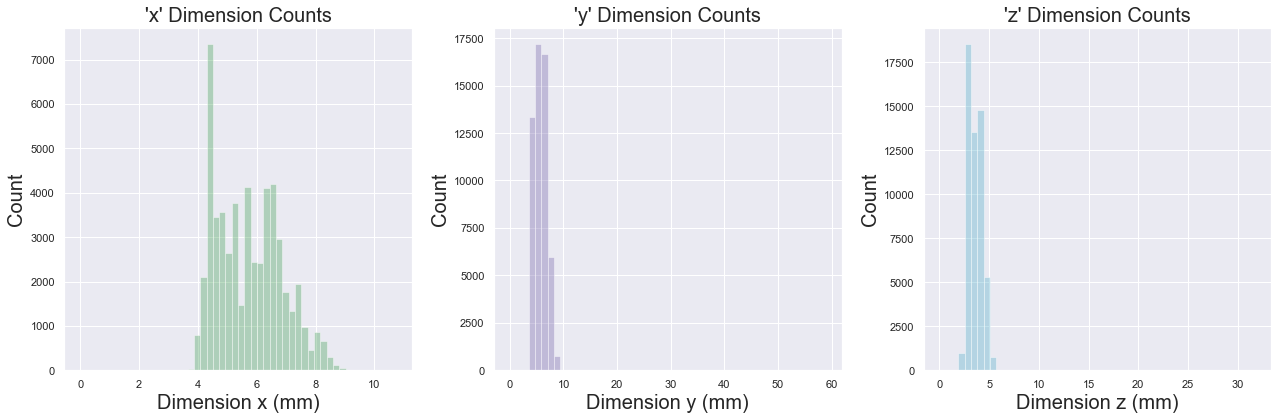

In [23]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(18,6))

from scipy.stats import norm

sns.distplot(diamond['x'], bins=50, ax=ax1, color='g', kde=False, hist=True, norm_hist=False)#, fit=norm)
sns.distplot(diamond['y'], bins=50, ax=ax2, color='m',kde=False, hist=True, norm_hist=False)#,fit=norm)
sns.distplot(diamond['z'], bins=50, ax=ax3, color='c', kde=False, hist=True, norm_hist=False)#,fit=norm)

ax1.set_title("'x' Dimension Counts", fontsize=20)
ax2.set_title("'y' Dimension Counts", fontsize=20)
ax3.set_title("'z' Dimension Counts", fontsize=20)
ax1.set_ylabel('Count', fontsize=20)
ax2.set_ylabel('Count', fontsize=20)
ax3.set_ylabel('Count', fontsize=20)
ax1.set_xlabel('Dimension x (mm)', fontsize=20)
ax2.set_xlabel('Dimension y (mm)', fontsize=20)
ax3.set_xlabel('Dimension z (mm)', fontsize=20)
plt.tight_layout()
plt.show()

From these plots, we don't really see a normal distribution just yet - we have outliers that skew the plots.

# Remove Outliers

In [24]:
# Lets investigate 2 methods with dealing with outliers - interquartile range and z-score.
# Z-score identifies instances where the numeric value falls outside 3 (threshold) standard deviations from the mean.
# IQR method identifies instances where they fall outside 1.5 x the range between the 25% quartile and 75% quartile.

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)


def outliers_iqr_val(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return (lower_bound, upper_bound)



In [25]:
#First - x dimension
x_out_I = outliers_iqr(diamond['x'])
x_out_Z = outliers_z_score(diamond['x'])
x_out_vals = outliers_iqr_val(diamond['x'])
x_out_vals

(1.9649999999999999, 9.285)

In [26]:
#Viewing all the instances that qualify as outliers for the 'y' dimension.
diamond.iloc[x_out_I[0],:]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,5,5,4,61.6,56.0,4954,0.00,6.62,0.00
11963,1.00,3,3,6,63.3,53.0,5139,0.00,0.00,0.00
15951,1.14,1,4,7,57.5,67.0,6381,0.00,0.00,0.00
22741,3.01,1,3,3,56.1,62.0,10761,9.54,9.38,5.31
22831,3.00,2,2,3,57.0,64.0,10863,9.38,9.31,5.33
23644,3.65,1,3,3,67.1,53.0,11668,9.53,9.48,6.38
24131,3.24,4,3,3,62.1,58.0,12300,9.44,9.40,5.85
24297,3.22,5,2,3,62.6,55.0,12545,9.49,9.42,5.92
24328,3.50,5,3,3,62.8,57.0,12587,9.65,9.59,6.03
24520,1.56,5,4,6,62.2,54.0,12800,0.00,0.00,0.00


In [27]:
# For Z-Score method:
print(len(x_out_I[0]))
print(len(x_out_Z[0]))

32
43


The Z-score method obtains slightly more outlier instances. For clustering, it may be useful to include diamonds at the higher end of the spectrum. However, values of 0mm are clearly wrong. 

Lets only include diamonds with a x dim > 0mm.

In [28]:
diamond_ro = diamond[(diamond['x']>0)]

In [29]:
#Second - y dimension
y_out_I = outliers_iqr(diamond['y'])
y_out_Z = outliers_z_score(diamond['y'])
y_out_vals = outliers_iqr_val(diamond['y'])
y_out_vals

(1.9899999999999993, 9.27)

In [30]:
#Viewing all the instances that qualify as outliers for the 'y' dimension.
diamond.iloc[y_out_I[0],:]

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,3,3,6,63.3,53.0,5139,0.00,0.00,0.00
15951,1.14,1,4,7,57.5,67.0,6381,0.00,0.00,0.00
22741,3.01,1,3,3,56.1,62.0,10761,9.54,9.38,5.31
22831,3.00,2,2,3,57.0,64.0,10863,9.38,9.31,5.33
23644,3.65,1,3,3,67.1,53.0,11668,9.53,9.48,6.38
24067,2.00,4,3,4,58.9,57.0,12210,8.09,58.90,8.06
24131,3.24,4,3,3,62.1,58.0,12300,9.44,9.40,5.85
24297,3.22,5,2,3,62.6,55.0,12545,9.49,9.42,5.92
24328,3.50,5,3,3,62.8,57.0,12587,9.65,9.59,6.03
24520,1.56,5,4,6,62.2,54.0,12800,0.00,0.00,0.00


In [31]:
print(len(y_out_I[0]))
print(len(y_out_Z[0]))

29
34


For clustering, it may be useful to include diamonds at the higher end of the spectrum. However, values of 0mm are clearly wrong. Additionally, those with very large values (such as 31.8mm for a 0.51 carat diamond) make no sense.

Lets only include diamonds with a y dim > 0mm and less than 11mm.

In [32]:
diamond_ro = diamond_ro[(diamond_ro['y']<=10) & (diamond_ro['y']>0)]

In [33]:
#Lastly, dimension z
z_out_I = outliers_iqr(diamond['z'])
z_out_Z = outliers_z_score(diamond['z'])
z_out_vals = outliers_iqr_val(diamond['z'])
z_out_vals

(1.2150000000000003, 5.734999999999999)

In [34]:
diamond.iloc[z_out_I[0],:]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,4,4,4,59.1,59.0,3142,6.55,6.48,0.00
2314,1.01,4,3,3,58.1,59.0,3167,6.66,6.60,0.00
4791,1.10,4,4,4,63.0,59.0,3696,6.50,6.47,0.00
5471,1.01,4,5,4,59.2,58.0,3837,6.50,6.47,0.00
10167,1.50,2,4,3,64.0,61.0,4731,7.15,7.04,0.00
11182,1.07,5,5,4,61.6,56.0,4954,0.00,6.62,0.00
11963,1.00,3,3,6,63.3,53.0,5139,0.00,0.00,0.00
13601,1.15,5,4,6,59.2,56.0,5564,6.88,6.83,0.00
14635,1.07,5,5,5,60.6,57.0,5909,6.62,6.67,1.07
15951,1.14,1,4,7,57.5,67.0,6381,0.00,0.00,0.00


In [35]:
print(len(z_out_I[0]))
print(len(z_out_Z[0]))

49
55


Similar to the others, it may be useful to include diamonds at the higher end of the spectrum. However, values of 0mm are clearly wrong. Additionally, those with very large values (such as 31.8mm for a 0.51 carat diamond) make no sense.

Lets only include diamonds with a x dim > 0mm and less than 8mm.

In [36]:
diamond_ro = diamond_ro[(diamond_ro['z']<=8) & (diamond_ro['z']>0)]

### Investigate 'table' and 'depth'

In [37]:
for i in ['table','depth']:
    diamond_ro[i] = diamond_ro[i].apply(lambda x: x/100)

In [38]:
for i in ['table','depth']:
    print(max(diamond_ro[i]))
    print(min(diamond_ro[i]))

0.95
0.43
0.79
0.43


There are no outlier issues with table or depth, as these values are a ratio.

In [39]:
#Updated DataFrame
diamond_ro.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,4,0.615,0.55,326,3.95,3.98,2.43
1,0.21,4,6,5,0.598,0.61,326,3.89,3.84,2.31
2,0.23,2,6,7,0.569,0.65,327,4.05,4.07,2.31
3,0.29,4,2,6,0.624,0.58,334,4.20,4.23,2.63
4,0.31,2,1,4,0.633,0.58,335,4.34,4.35,2.75


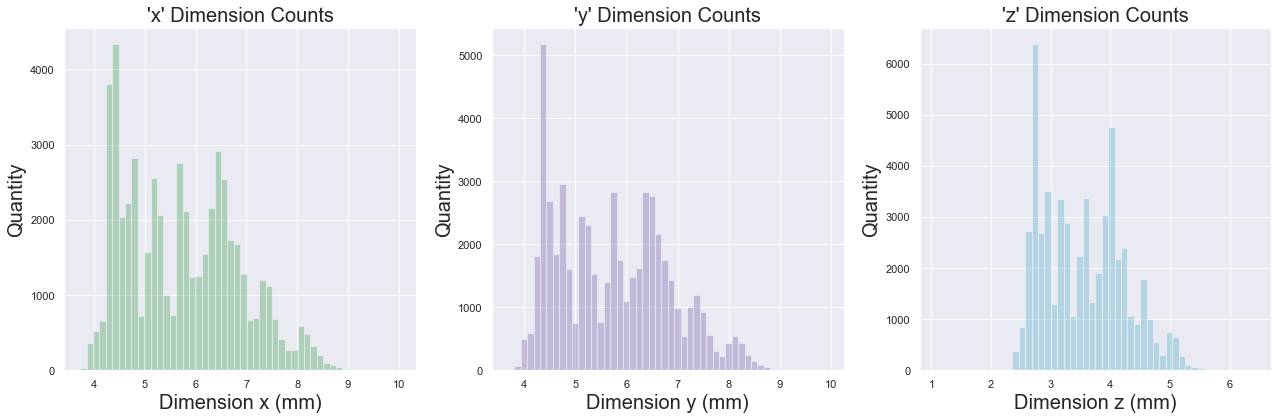

In [40]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(18,6))

sns.distplot(diamond_ro['x'], bins=50, ax=ax1, color='g', kde=False, hist=True, norm_hist=False)#, fit=norm)
sns.distplot(diamond_ro['y'], bins=50, ax=ax2, color='m',kde=False, hist=True, norm_hist=False)#,fit=norm)
sns.distplot(diamond_ro['z'], bins=50, ax=ax3, color='c', kde=False, hist=True, norm_hist=False)#,fit=norm)

ax1.set_title("'x' Dimension Counts", fontsize=20)
ax2.set_title("'y' Dimension Counts", fontsize=20)
ax3.set_title("'z' Dimension Counts", fontsize=20)
ax1.set_ylabel('Quantity', fontsize=20)
ax2.set_ylabel('Quantity', fontsize=20)
ax3.set_ylabel('Quantity', fontsize=20)
ax1.set_xlabel('Dimension x (mm)', fontsize=20)
ax2.set_xlabel('Dimension y (mm)', fontsize=20)
ax3.set_xlabel('Dimension z (mm)', fontsize=20)
plt.tight_layout()

plt.show()

Our distribution for dimensions x,y,z appear much more normal. Ideally, these distributions should be as normal as possible, lets proceed regardless.

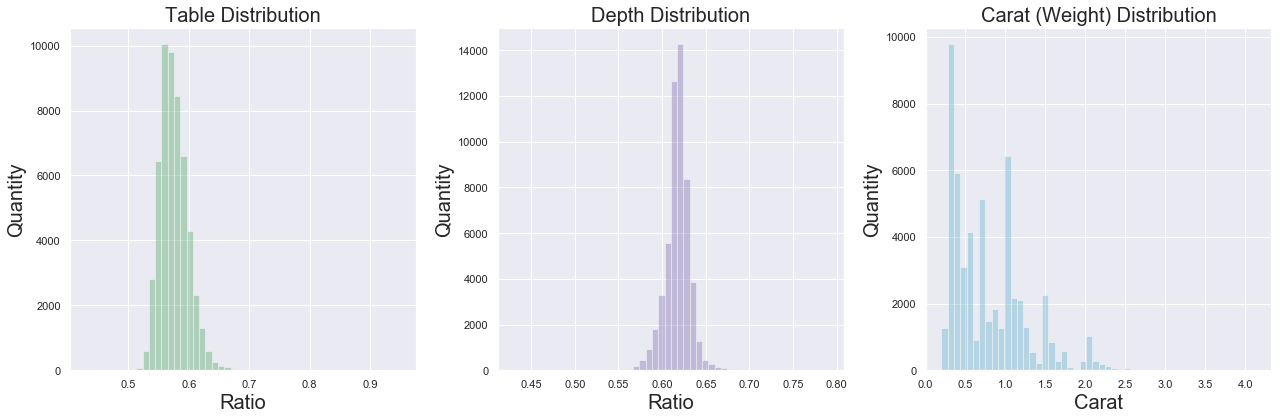

In [41]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(18,6))

sns.distplot(diamond_ro['table'], bins=50, ax=ax1, color='g', kde=False, hist=True, norm_hist=False)#, fit=norm)
sns.distplot(diamond_ro['depth'], bins=50, ax=ax2, color='m',kde=False, hist=True, norm_hist=False)#,fit=norm)
sns.distplot(diamond_ro['carat'], bins=50, ax=ax3, color='c', kde=False, hist=True, norm_hist=False)#,fit=norm)

ax1.set_title("Table Distribution", fontsize=20)
ax2.set_title("Depth Distribution", fontsize=20)
ax3.set_title("Carat (Weight) Distribution", fontsize=20)
ax1.set_ylabel('Quantity', fontsize=20)
ax2.set_ylabel('Quantity', fontsize=20)
ax3.set_ylabel('Quantity', fontsize=20)
ax1.set_xlabel('Ratio', fontsize=20)
ax2.set_xlabel('Ratio', fontsize=20)
ax3.set_xlabel('Carat', fontsize=20)
plt.tight_layout()
plt.show()

# Standardize Sizes

In [42]:
from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaled = scaler.fit(diamond_ro[['table','depth','x','y','z',]])
a = scaled.transform(diamond_ro[['table','depth','x','y','z']])
a

array([[-1.09972388, -0.17416845, -1.59207187, -1.57833335, -1.60469373],
       [ 1.58598493, -1.36119998, -1.64569663, -1.70437127, -1.77829339],
       [ 3.37645747, -3.38613611, -1.50269728, -1.49730898, -1.77829339],
       ...,
       [ 1.13836679,  0.73356155, -0.06376623, -0.04787295,  0.03003637],
       [ 0.24313052, -0.52329537,  0.37416931,  0.34824621,  0.29043586],
       [-1.09972388,  0.31460924,  0.08817059,  0.1231785 ,  0.14576948]])

In [43]:
diamond_ro_st = diamond_ro.copy()

diamond_ro_st['table_s'] = a[:,0]
diamond_ro_st['depth_s'] = a[:,1]
diamond_ro_st['x_s'] = a[:,2]
diamond_ro_st['y_s'] = a[:,3]
diamond_ro_st['z_s'] = a[:,4]

In [44]:
diamond_ro_st = diamond_ro_st.drop(columns=['table','depth','x','y','z'])
diamond_ro_st.head(3)

,carat,cut,color,clarity,price,table_s,depth_s,x_s,y_s,z_s
0,0.23,5,6,4,326,-1.099724,-0.174168,-1.592072,-1.578333,-1.604694
1,0.21,4,6,5,326,1.585985,-1.361200,-1.645697,-1.704371,-1.778293
2,0.23,2,6,7,327,3.376457,-3.386136,-1.502697,-1.497309,-1.778293


In [45]:
# Create Dataframe without Price Included
diamond_ro_st_noP = diamond_ro_st.drop(columns=['price'])

## Apply MinMax Scaler to Carat, Cut, Color, Clarity, Price

In [46]:
#Create data frame

diamond_ro_st_sc  = diamond_ro_st.copy()
diamond_ro_st_sc.reset_index(drop=True,inplace=True)
diamond_ro_st_sc.shape

(53914, 10)

In [47]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

diamond_ro_st_sc = scaleColumns(diamond_ro_st_sc ,['carat','cut','color','clarity','price'])
diamond_ro_st_sc.head()

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,carat,cut,color,clarity,price,table_s,depth_s,x_s,y_s,z_s
0,0.007634,1.00,0.833333,0.142857,0.000000,-1.099724,-0.174168,-1.592072,-1.578333,-1.604694
1,0.002545,0.75,0.833333,0.285714,0.000000,1.585985,-1.361200,-1.645697,-1.704371,-1.778293
2,0.007634,0.25,0.833333,0.571429,0.000054,3.376457,-3.386136,-1.502697,-1.497309,-1.778293
3,0.022901,0.75,0.166667,0.428571,0.000433,0.243131,0.454260,-1.368635,-1.353266,-1.315361
4,0.027990,0.25,0.000000,0.142857,0.000487,0.243131,1.082688,-1.243511,-1.245233,-1.141761


In [48]:
diamond_ro_st_sc_noP = diamond_ro_st_sc.drop(['price'],axis=1)

In [49]:
# Check shapes of each of our 4 data frames
print(diamond_ro_st.shape)
print(diamond_ro_st_sc.shape)
print(diamond_ro_st_noP.shape)
print(diamond_ro_st_sc_noP.shape)

(53914, 10)
(53914, 10)
(53914, 9)
(53914, 9)


# Create Clustering Class

To execute each of the unsupervised clustering methods, a class named "ClusterTime" is defined to help condense the code. An instance is created by passing through a pandas dataframe. This allows use of principal component analysis (PCA).

Note that error handling has not been provided at this time.

In [50]:
class ClusterTime:

    '''
    Initialize Class
    '''
    def __init__ (self, data_frame):
    
        self.data_frame = data_frame
 
    '''
    Define method that runs Kmeans clustering, either using the original dataframe or the PCA transformed data frame.
    '''    
    def kmeans_style(self, k, elbow=False, return_new_df=False, use_pca = False):
        
        from sklearn import cluster
        from sklearn.metrics import silhouette_score
        
        if use_pca == False: 
            X = self.data_frame
            text_use = "no pca"
        elif use_pca == True:
            X = self.ppc
            text_use = "pca"
                  
        kmeans = cluster.KMeans(k)
        clusters = kmeans.fit(X)
        self.labels_kmeans = clusters.fit_predict(X)    
            
        self.sil_score_kmeans = (round(silhouette_score(X,self.labels_kmeans, metric = 'euclidean'),k))
        print(f"Silhouette Score for Kmeans with {text_use} and k={k} : {self.sil_score_kmeans}")
        self.kmeans_centers = kmeans.cluster_centers_    
            
        if elbow == True:
            model = cluster.KMeans()
            self.ElbowPlot(model)
          
        if return_new_df == True:
            return self.merge_df('label-kmeans', self.labels_kmeans) 
        else:
            return self.labels_kmeans
    
    
    '''
    Function that uses DBSCAN clustering, using either the original
    data frame or the PCA-transformed dataframe.
    '''
    def dbscan_style(self, epsilon, return_new_df=False, use_pca=False, show_plot=False):
        
        from sklearn.cluster import DBSCAN
        from sklearn.metrics import silhouette_score
        
        if use_pca == True:
            X = self.ppc
        else:
            X = self.data_frame
        
        dbscan = DBSCAN(eps=epsilon).fit(X)
        self.labels_db = dbscan.labels_
        
        counts = np.bincount(self.labels_db[self.labels_db>=0])
        k = len(counts)
        
        self.sil_score_db = (round(silhouette_score(X,self.labels_db, metric = 'euclidean'),k))
        print(f"Silhouette Score for DBSCAN with epsilon={epsilon} : {self.sil_score_db}")
        print(f" Number of Clusters 'k' = {k}")

        if show_plot == True:
            self.Scatter(scatter_type='pca-dbs')
        
        if return_new_df == True:
            return self.merge_df('label-dbscan', self.labels_db)
        else:
            return self.labels_db

        
    '''
    Method for Hierarchial Clustering
    '''
    def hier_style(self):
    
        from sklearn.cluster import AgglomerativeClustering
        from sklearn.metrics import silhouette_score
        
        sample = self.data_frame.sample(100)

        hier_clust = AgglomerativeClustering(linkage='ward')
        hier_fitted = hier_clust.fit(sample)
        self.labels_hier = hier_fitted.labels_
        
        counts = np.bincount(self.labels_hier[self.labels_hier>=0])
        k = len(counts)
        
        self.sil_score_hier = (round(silhouette_score(sample,self.labels_hier, metric = 'euclidean'),k))
        print(f"Silhouette Score for Hierarchial Clustering : {self.sil_score_hier}")
        
        self.plot_dendrogram(hier_fitted, labels=self.labels_hier)

  
    def plot_dendrogram(self, model, **kwargs):
        
        from scipy.cluster.hierarchy import dendrogram

        # Children of hierarchical clustering
        children = model.children_

        # Distances between each pair of children
        # Since we don't have this information, we can use a uniform one for plotting
        distance = np.arange(children.shape[0])

        # The number of observations contained in each cluster level
        no_of_observations = np.arange(2, children.shape[0]+2)

        # Create linkage matrix and then plot the dendrogram
        linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

        # Plot the corresponding dendrogram
        dendrogram(linkage_matrix, **kwargs)

    '''
    Method that combines the newly determined labels with the dataframe.
    '''
    def merge_df(self,c_method, labels):
    
        merged_frame = self.data_frame.copy()
        merged_frame[str(c_method)] = labels
        return merged_frame
    
    '''
    Method that runs a PCA transform, based on the input n_comp number of components.
    '''
    def PCA_transform(self, n_comp):
        
        from sklearn.decomposition import PCA

        pca = PCA(n_comp)
        pc = pca.fit_transform(self.data_frame)
        cols = []
        for i in range(0,n_comp):
            x = str(i+1)
            cols.append('pc'+x)
        
        self.ppc = pd.DataFrame(data=pc,columns=cols)
        
        explained_var_ratio = pca.explained_variance_ratio_
        print(f'Total utilization = {sum(explained_var_ratio)}')
        print(self.ppc.shape)
        print(pca)
        print(pca.explained_variance_ratio_)
    
    '''
    Method that prints an elbow plot.
    '''
    
    def ElbowPlot(self, model):
        
        from yellowbrick.cluster import KElbowVisualizer
        visualizer = KElbowVisualizer(model, k=(1,12))
        visualizer.fit(self.data_frame)
        visualizer.poof()
    '''
    Method for providing various plots.
    '''    
    def Scatter(self, scatter_type='pca-kmeans'):
        
        colors= np.array(['green','purple','cyan','orange','magenta','blue','yellow','red'])
        
        #Using PCA points, clustering from straight-up kmeans on the full data
        if scatter_type == 'pca-kmeans':
            plt.figure(figsize=(8,6))
            plt.scatter(self.ppc.iloc[:,0],self.ppc.iloc[:,1],c=colors[self.labels_kmeans])
        
        elif scatter_type == 'pca-dbs':
            plt.figure(figsize=(8,6))
            plt.scatter(self.ppc.iloc[:,0],self.ppc.iloc[:,1],c=colors[self.labels_db])
        
        elif scatter_type == '2d':
            flag = True
            while flag == True:

                x1 = int(input('Enter variable/column number for X1 (1st pair): '))
                x2 = int(input('Enter variable/column number for X2 (1st pair): '))
                x3 = int(input('Enter variable/column number for X3 (2nd pair): '))
                x4 = int(input('Enter variable/column number for X4 (2nd pair): '))
                
                if max(x1,x2,x3,x4) < self.data_frame.shape[1]:
                    print('On y va')
                    flag = False
                else:
                    print('Not acceptable, try again')
            
            fig, ax = plt.subplots(1,2,figsize=(16,4))    
            ax[0].scatter(self.data_frame.iloc[:,x1],self.data_frame.iloc[:,x2],c=colors[self.labels_kmeans])
            ax[1].scatter(self.data_frame.iloc[:,x3],self.data_frame.iloc[:,x4],c=colors[self.labels_kmeans])
            
            ax[0].set_xlabel(xlabel=self.data_frame.columns[x1], fontsize=16)
            ax[0].set_ylabel(ylabel=self.data_frame.columns[x2], fontsize=16)
            ax[1].set_xlabel(xlabel=self.data_frame.columns[x3], fontsize=16)
            ax[1].set_ylabel(ylabel=self.data_frame.columns[x4], fontsize=16)

    """
    Getter Method
    """
    
    def get_df(self):     
        return(self.data_frame)
        

    
   

## Initialize first ClusterTime instance "a"

In [78]:
sns.set()

In [52]:
a = ClusterTime(data_frame=diamond_ro_st_noP)

Silhouette Score for Kmeans with no pca and k=3 : 0.216


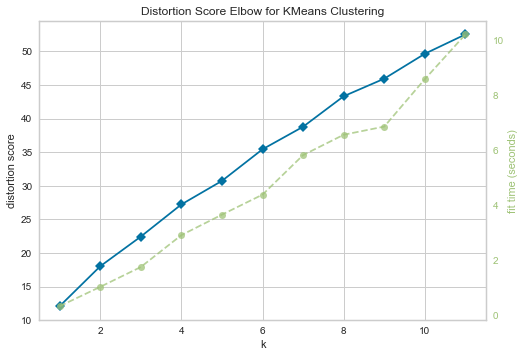

array([2, 2, 2, ..., 2, 0, 2])

In [53]:
a.kmeans_style(3, elbow=True)

Enter variable/column number for X1 (1st pair): 0
Enter variable/column number for X2 (1st pair): 1
Enter variable/column number for X3 (2nd pair): 0
Enter variable/column number for X4 (2nd pair): 2
On y va


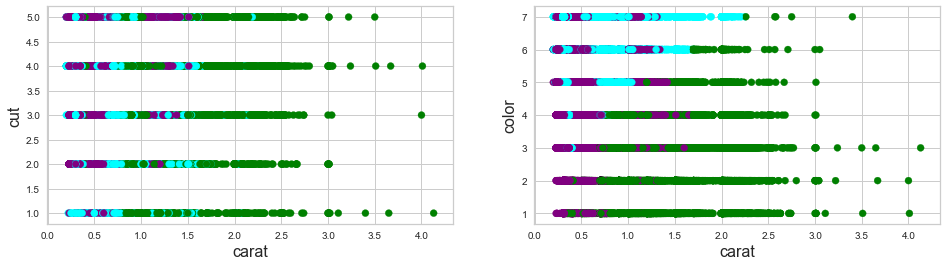

In [54]:
a.Scatter(scatter_type='2d')

Enter variable/column number for X1 (1st pair): 0
Enter variable/column number for X2 (1st pair): 3
Enter variable/column number for X3 (2nd pair): 1
Enter variable/column number for X4 (2nd pair): 2
On y va


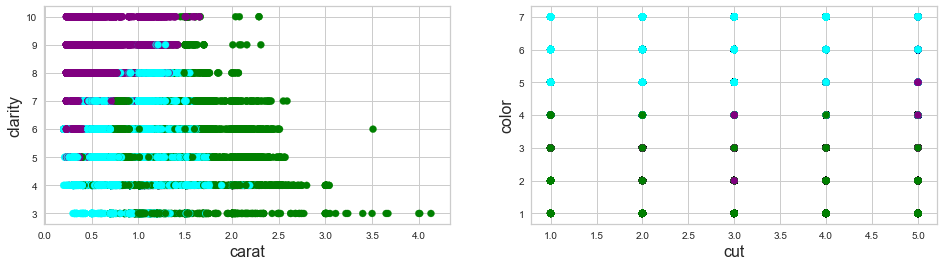

In [55]:
a.Scatter(scatter_type='2d')

In [56]:
a.PCA_transform(n_comp=3)

Total utilization = 0.745267249962905
(53914, 3)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[0.37012969 0.24296943 0.13216812]


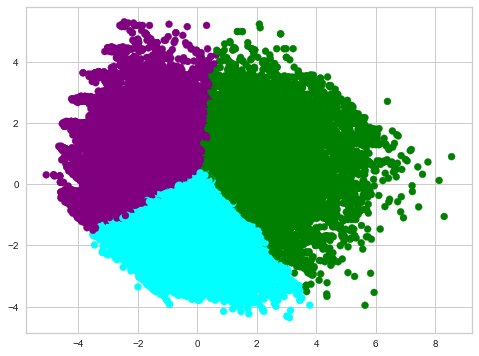

In [57]:
a.Scatter(scatter_type='pca-kmeans')

In [58]:
a.kmeans_style(2, use_pca=True)

Silhouette Score for Kmeans with pca and k=2 : 0.31


array([1, 1, 1, ..., 1, 0, 1])

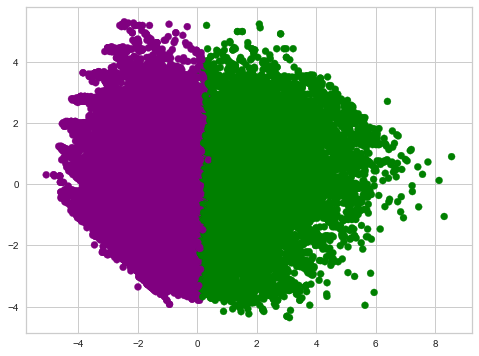

In [59]:
a.Scatter(scatter_type='pca-kmeans')

In [60]:
a.kmeans_style(4, use_pca=True)

Silhouette Score for Kmeans with pca and k=4 : 0.2666


array([0, 0, 0, ..., 3, 1, 3])

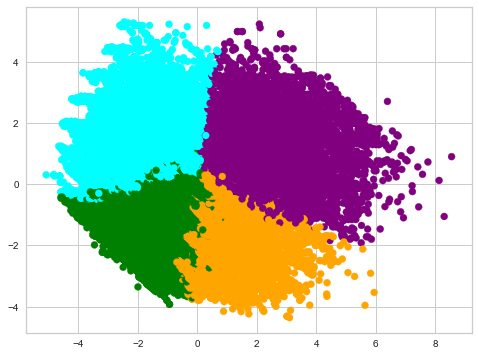

In [61]:
a.Scatter(scatter_type='pca-kmeans')

Silhouette Score for DBSCAN with epsilon=1.2 : 0.007602
 Number of Clusters 'k' = 6


array([ 0,  0, -1, ...,  0,  0,  0], dtype=int64)

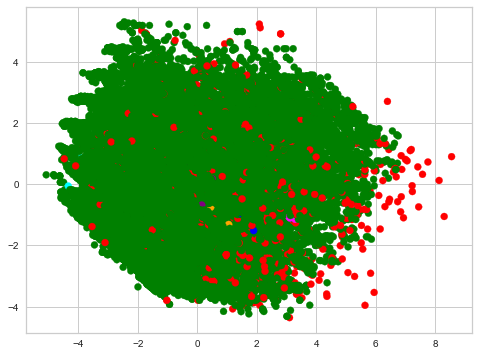

In [62]:
a.dbscan_style(epsilon=1.2, show_plot=True)

Silhouette Score for DBSCAN with epsilon=1.2 : 0.5
 Number of Clusters 'k' = 1


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

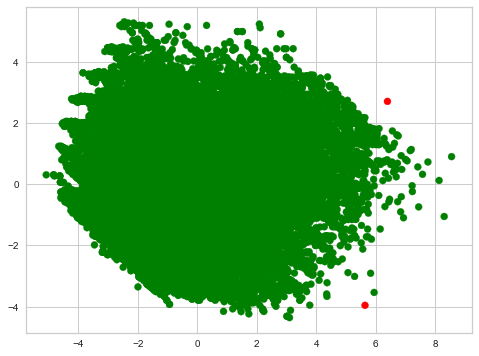

In [63]:
a.dbscan_style(epsilon=1.2, show_plot=True, use_pca=True)

Silhouette Score for Hierarchial Clustering : 0.21


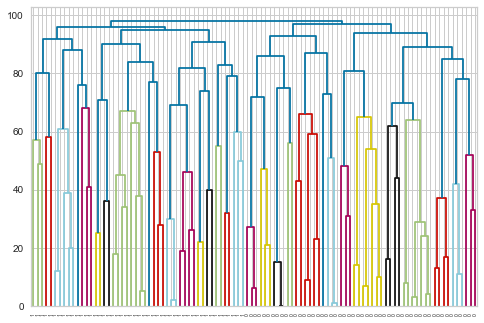

In [64]:
#This plot is meaningless for us given our data set, just plotting to show it is possible.
a.hier_style()

From reviewing our plots, we can see that our data is uniformly distributed. Hence, DBSCAN is ineffective at providing any real separation between points, mainly since no real identifiable clusters exist. Kmeans is a bit better but simply appears to divide the data in 'k' equal slices, which is typical of uniformaly distributed data.

# Case B - No Price, numbers standardized AND max/min scaled

In [65]:
b = ClusterTime(data_frame=diamond_ro_st_sc_noP)

Silhouette Score for Kmeans with no pca and k=2 : 0.38


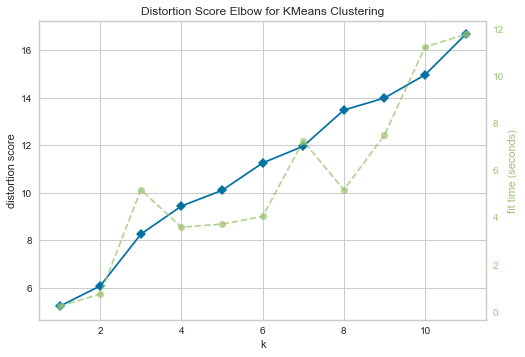

array([1, 1, 1, ..., 0, 0, 1])

In [66]:
b.kmeans_style(2, elbow=True)

Enter variable/column number for X1 (1st pair): 0
Enter variable/column number for X2 (1st pair): 1
Enter variable/column number for X3 (2nd pair): 0
Enter variable/column number for X4 (2nd pair): 2
On y va


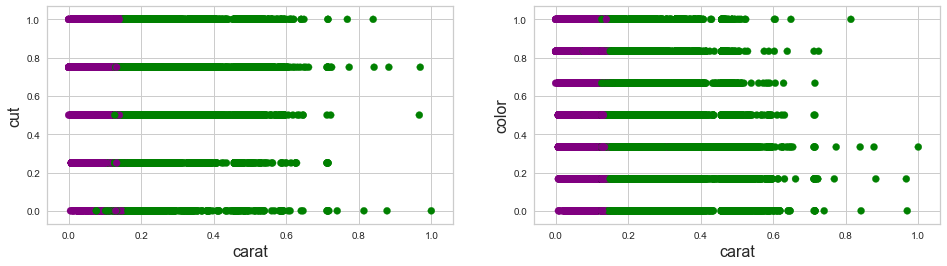

In [67]:
b.Scatter(scatter_type='2d')

Enter variable/column number for X1 (1st pair): 0
Enter variable/column number for X2 (1st pair): 3
Enter variable/column number for X3 (2nd pair): 1
Enter variable/column number for X4 (2nd pair): 2
On y va


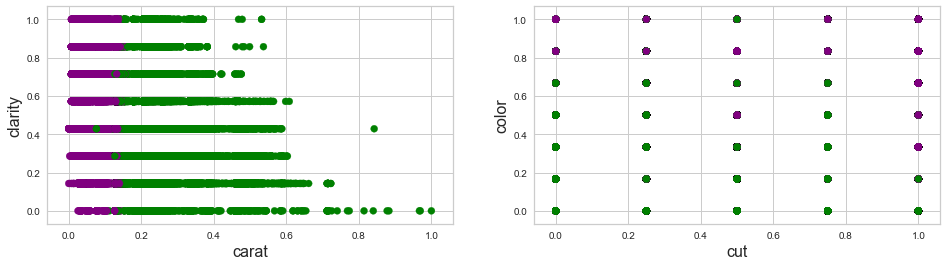

In [68]:
b.Scatter(scatter_type='2d')

In [69]:
b.PCA_transform(n_comp=3)

Total utilization = 0.9665064483908208
(53914, 3)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[0.58632399 0.24501834 0.13516412]


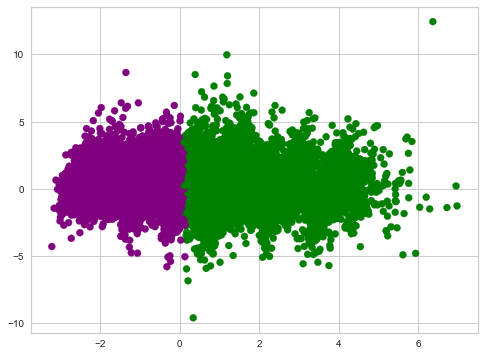

In [70]:
b.Scatter(scatter_type='pca-kmeans')

In [71]:
dfb = b.kmeans_style(2, return_new_df=True, use_pca=True)

Silhouette Score for Kmeans with pca and k=2 : 0.4


In [72]:
dfb['label-kmeans'].value_counts()

1    29571
0    24343
Name: label-kmeans, dtype: int64

In [73]:
b.Scatter(scatter_type='pca-kmeans_pca')

Silhouette Score for DBSCAN with epsilon=1.2 : 0.6
 Number of Clusters 'k' = 1


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

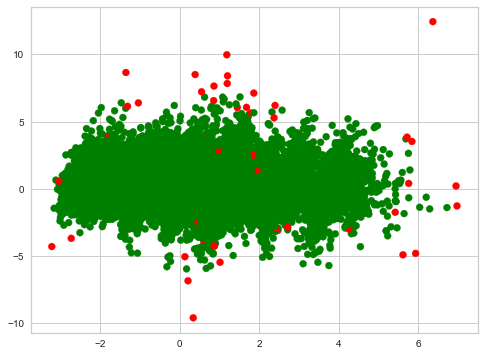

In [74]:
b.dbscan_style(epsilon=1.2, show_plot=True)

In [75]:
diamond_ro_LABELb = diamond_ro.copy()
diamond_ro_LABELb['label-kmp'] = dfb['label-kmeans']

In [76]:
diamond_ro_LABELb.groupby(by='label-kmp').mean()

,carat,cut,color,clarity,depth,table,price,x,y,z
label-kmp,,,,,,,,,,
0.0,1.177532,3.756547,4.092086,5.603577,0.617794,0.578567,6883.866434,6.674010,6.669869,4.121029
1.0,0.484811,4.026046,4.664073,6.420830,0.617248,0.571274,1500.843419,4.955636,4.962375,3.060488


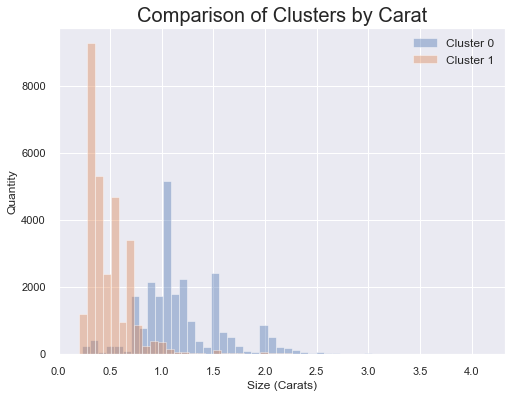

In [79]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABELb[diamond_ro_LABELb['label-kmp'] == 0.0]
sns.distplot(df['carat'],  kde=False, label='Cluster 0')

df = diamond_ro_LABELb[diamond_ro_LABELb['label-kmp'] == 1.0]
sns.distplot(df['carat'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Carat', fontsize=20)
plt.xlabel('Size (Carats)')
plt.ylabel('Quantity')

plt.show()

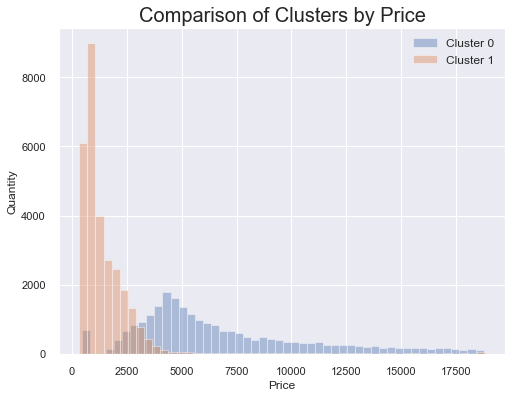

In [80]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABELb[diamond_ro_LABELb['label-kmp'] == 0.0]
sns.distplot(df['price'],  kde=False, label='Cluster 0')

df = diamond_ro_LABELb[diamond_ro_LABELb['label-kmp'] == 1.0]
sns.distplot(df['price'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Price', fontsize=20)
plt.xlabel('Price')
plt.ylabel('Quantity')

plt.show()

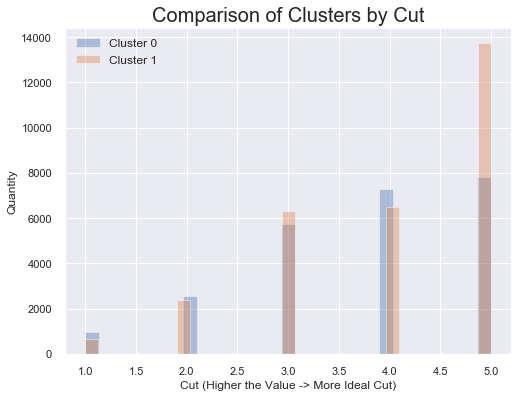

In [81]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABELb[diamond_ro_LABELb['label-kmp'] == 0.0]
sns.distplot(df['cut'],  kde=False, label='Cluster 0')

df = diamond_ro_LABELb[diamond_ro_LABELb['label-kmp'] == 1.0]
sns.distplot(df['cut'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Cut', fontsize=20)
plt.xlabel('Cut (Higher the Value -> More Ideal Cut)')
plt.ylabel('Quantity')

plt.show()

With the scaled values, our model improved slightly which we can see with the improved Silhouette Score (0.4 is the max we've seen). While the data is still uniformly distributed, we can see with kmeans (k=2) the alrogithm separates the larger (heavier by carat) with the smaller. As a result, we can see that the cluster including the heavier diamonds also are the most expensive, regardless of color, cut, clarity, and other factors. The lighter diamond group even appears to have better averages for cut, clarity, and color then for the more expensive group.

# C - With Scaled Price, numbers standardized AND max/min scaled

In [82]:
diamond_ro_st_sc.head(3)

,carat,cut,color,clarity,price,table_s,depth_s,x_s,y_s,z_s
0,0.007634,1.00,0.833333,0.142857,0.000000,-1.099724,-0.174168,-1.592072,-1.578333,-1.604694
1,0.002545,0.75,0.833333,0.285714,0.000000,1.585985,-1.361200,-1.645697,-1.704371,-1.778293
2,0.007634,0.25,0.833333,0.571429,0.000054,3.376457,-3.386136,-1.502697,-1.497309,-1.778293


In [83]:
c = ClusterTime(data_frame=diamond_ro_st_sc)

Silhouette Score for Kmeans with no pca and k=2 : 0.38


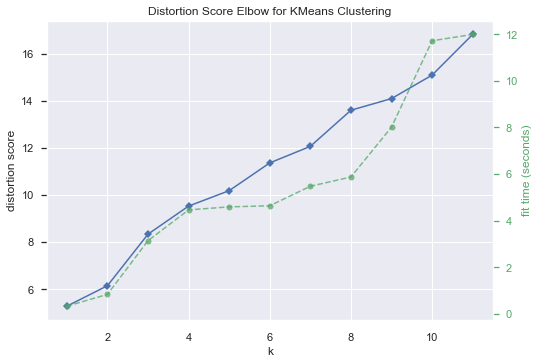

array([0, 0, 0, ..., 0, 1, 0])

In [84]:
c.kmeans_style(2, elbow=True, return_new_df=False)

Enter variable/column number for X1 (1st pair): 0
Enter variable/column number for X2 (1st pair): 1
Enter variable/column number for X3 (2nd pair): 0
Enter variable/column number for X4 (2nd pair): 2
On y va


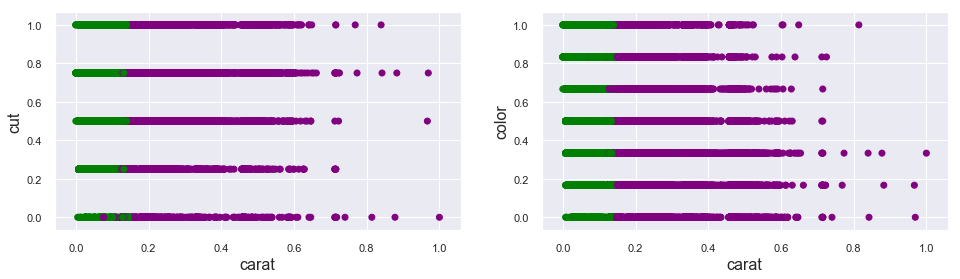

In [85]:
c.Scatter(scatter_type='2d')

In [86]:
c.PCA_transform(n_comp=3)

Total utilization = 0.9649639850877705
(53914, 3)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[0.58799742 0.24290177 0.13406479]


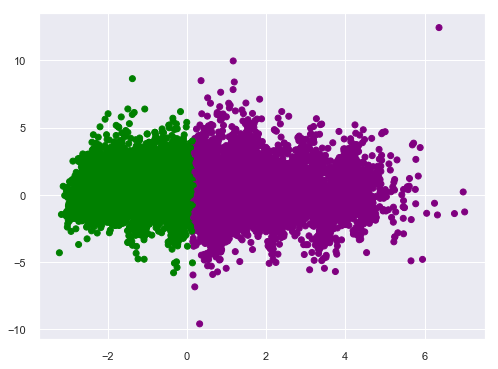

In [87]:
c.Scatter(scatter_type='pca-kmeans')

In [89]:
#Return Data Frame for further analysis
dfc = c.kmeans_style(2, return_new_df=True, use_pca=True)

Silhouette Score for Kmeans with pca and k=2 : 0.4


In [91]:
dfc.head(1)

,carat,cut,color,clarity,price,table_s,depth_s,x_s,y_s,z_s,label-kmeans
0,0.007634,1.0,0.833333,0.142857,0.0,-1.099724,-0.174168,-1.592072,-1.578333,-1.604694,1


In [93]:
dfc['label-kmeans'].value_counts()

1    29800
0    24114
Name: label-kmeans, dtype: int64

In [94]:
diamond_ro_LABEL = diamond_ro.copy()
diamond_ro_LABEL['label-kmp'] = dfc['label-kmeans']

In [95]:
diamond_ro_LABEL['label-kmp'].value_counts()

1.0    29792
0.0    24096
Name: label-kmp, dtype: int64

In [96]:
diamond_ro_LABEL.groupby(by='label-kmp').mean()

,carat,cut,color,clarity,depth,table,price,x,y,z
label-kmp,,,,,,,,,,
0.0,1.182120,3.756225,4.086155,5.600224,0.617801,0.578596,6925.416003,6.683720,6.679534,4.127051
1.0,0.486425,4.024235,4.664474,6.417260,0.617247,0.571307,1508.615098,4.960991,4.967683,3.063769


In [97]:
diamond_ro_LABEL.groupby(by='label-kmp').std()

,carat,cut,color,clarity,depth,table,price,x,y,z
label-kmp,,,,,,,,,,
0.0,0.411567,1.127042,1.723284,1.492069,0.015569,0.022271,4040.703482,0.793409,0.785187,0.489922
1.0,0.226730,1.093318,1.637647,1.675698,0.013223,0.021861,1557.788393,0.655262,0.651040,0.406250


In [98]:
pd.crosstab(diamond_ro_LABEL.cut,diamond_ro_LABEL['label-kmp'])

label-kmp,0.0,1.0
cut,,
1,951,656
2,2516,2382
3,5702,6371
4,7214,6558
5,7713,13825


In [99]:
pd.crosstab(diamond_ro_LABEL.carat,diamond_ro_LABEL['label-kmp']).head(10)

label-kmp,0.0,1.0
carat,,
0.20,0,12
0.21,0,9
0.22,0,5
0.23,2,291
0.24,12,242
0.25,21,191
0.26,17,236
0.27,19,214
0.28,17,181


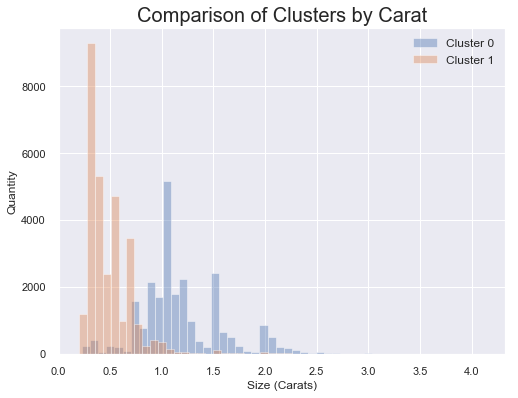

In [100]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 0.0]
sns.distplot(df['carat'],  kde=False, label='Cluster 0')

df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 1.0]
sns.distplot(df['carat'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Carat', fontsize=20)
plt.xlabel('Size (Carats)')
plt.ylabel('Quantity')

plt.show()

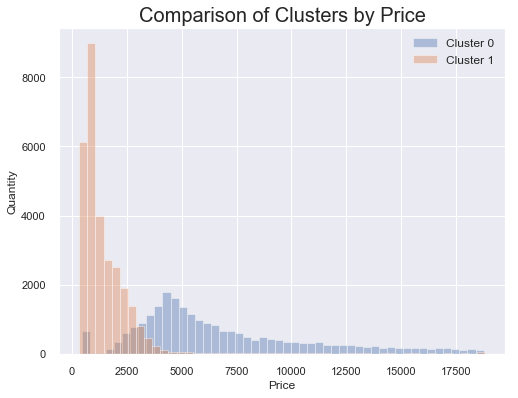

In [101]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 0.0]
sns.distplot(df['price'],  kde=False, label='Cluster 0')

df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 1.0]
sns.distplot(df['price'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Price', fontsize=20)
plt.xlabel('Price')
plt.ylabel('Quantity')

plt.show()

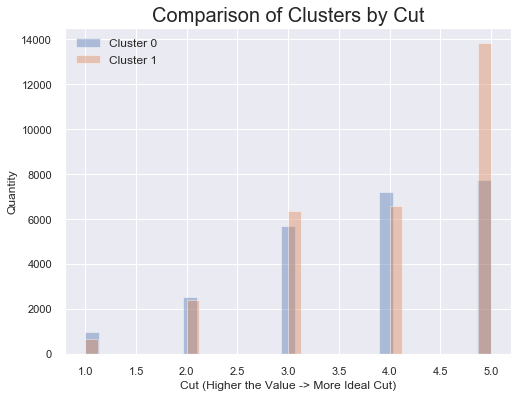

In [102]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 0.0]
sns.distplot(df['cut'],  kde=False, label='Cluster 0')

df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 1.0]
sns.distplot(df['cut'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Cut', fontsize=20)
plt.xlabel('Cut (Higher the Value -> More Ideal Cut)')
plt.ylabel('Quantity')

plt.show()

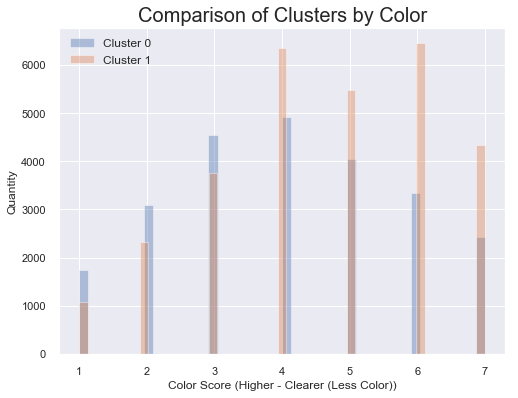

In [103]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 0.0]
sns.distplot(df['color'],  kde=False, label='Cluster 0')

df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 1.0]
sns.distplot(df['color'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Color', fontsize=20)
plt.xlabel('Color Score (Higher - Clearer (Less Color))')
plt.ylabel('Quantity')

plt.show()

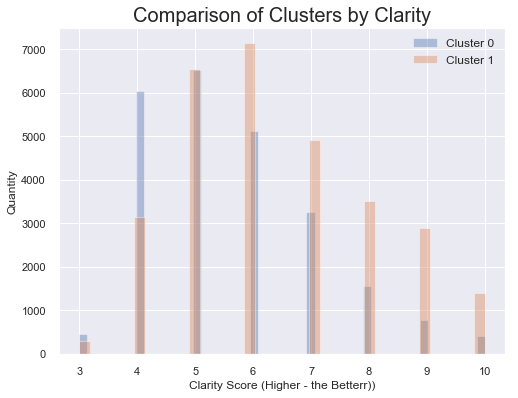

In [104]:
plt.figure(figsize=(8,6))


df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 0.0]
sns.distplot(df['clarity'],  kde=False, label='Cluster 0')

df = diamond_ro_LABEL[diamond_ro_LABEL['label-kmp'] == 1.0]
sns.distplot(df['clarity'],  kde=False,label='Cluster 1')


plt.legend(prop={'size': 12})
plt.title('Comparison of Clusters by Clarity', fontsize=20)
plt.xlabel('Clarity Score (Higher - the Betterr))')
plt.ylabel('Quantity')

plt.show()

Our results with the inclusion of Price did not really impact the clustering of our data in this case. We still see a distinction between the heavier diamonds and the lighter ones.